In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import matplotlib.animation as animation

from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from IPython import display

plt.rcParams['animation.ffmpeg_path'] = '/home/gp/softwares/anaconda3/envs/mat3py/bin/ffmpeg'

# Load the .mat file
mat_file = scipy.io.loadmat('data/CYLINDER_ALL.mat')


# Access variable names (assuming single variable)
variable_names = list(mat_file.keys())

# print(variable_names)


In [2]:
# Extracting the data from the .mat file
def extract_data_column(mat_file_object, column_name):
    data_col = np.array(mat_file_object[column_name])
    return data_col


# Extracting the data columns UALL, VALL, VORTALL
UALL = extract_data_column(mat_file, 'UALL')
VALL = extract_data_column(mat_file, 'VALL')
VORTALL = extract_data_column(mat_file, 'VORTALL')

print("Shape of UALL = ", UALL.shape, "Size of UALL = ", UALL.size)
print("Shape of VALL = ", VALL.shape, "Size of x_velocity = ", VALL.size)
print("Shape of VORTALL = ", VORTALL.shape, "Size of x_velocity = ", VORTALL.size)

# The grid nodes are of shape (1,1) containing only one value
# array.item() method extracts single item from the array
m = extract_data_column(mat_file, 'm').item()  # Number of evenly spaced samples in X-Direction
n = extract_data_column(mat_file, 'n').item()  # Number of evenly spaced samples in Y-Direction
nx = extract_data_column(mat_file, 'nx').item()  # End point for the grid-generation in X-Direction
ny = extract_data_column(mat_file, 'ny').item()  # End point for the grid-generation in X-Direction

print("m_val = ", m, "n_val = ", n)
print("nx_val = ", nx, "ny_val = ", ny)

num_snapshots_data = UALL.shape[1]
print("Number of snapshots = ", num_snapshots_data)

Shape of UALL =  (89351, 151) Size of UALL =  13492001
Shape of VALL =  (89351, 151) Size of x_velocity =  13492001
Shape of VORTALL =  (89351, 151) Size of x_velocity =  13492001
m_val =  199 n_val =  449
nx_val =  199 ny_val =  449
Number of snapshots =  151


In [3]:
# Generate a grid of points
x_velocity, y_velocity = np.meshgrid(np.linspace(0, nx, m), np.linspace(0, ny, n))
print("Shape of x_velocity = ", x_velocity.shape, "Size of x_velocity = ", x_velocity.size)
print("Shape of y_velocity = ", y_velocity.shape, "Size of y_velocity = ", y_velocity.size)

# Reshaping of the initial input vectors to match the grid size
uall_reduced = UALL[:, 0]
uall_reshaped = uall_reduced.reshape(x_velocity.shape)
print("Shape of UALL_reshape = ", uall_reshaped.shape, "Size of UALL_reshape = ", uall_reshaped.size)

vall_reduced = VALL[:, 0]
vall_reshaped = vall_reduced.reshape(y_velocity.shape)
print("Shape of VALL_reshape = ", vall_reshaped.shape, "Size of VALL_reshape = ", vall_reshaped.size)

vortall_reduced = VORTALL[:, 0]
vortall_reshaped = vortall_reduced.reshape(y_velocity.shape)
print("Shape of VORTALL_reshape = ", vortall_reshaped.shape, "Size of VORTALL_reshape = ", vortall_reshaped.size)


Shape of x_velocity =  (449, 199) Size of x_velocity =  89351
Shape of y_velocity =  (449, 199) Size of y_velocity =  89351
Shape of UALL_reshape =  (449, 199) Size of UALL_reshape =  89351
Shape of VALL_reshape =  (449, 199) Size of VALL_reshape =  89351
Shape of VORTALL_reshape =  (449, 199) Size of VORTALL_reshape =  89351


In [4]:
# Applying SVD to Vorticity and Velocity Matrices
# Singular Value Decomposition on Vorticity
U_vort, S_vort, VT_vort = np.linalg.svd(VORTALL, full_matrices=False)
S_vort = np.diag(S_vort)

# Singular Value Decomposition on Velocity U component
U_u, S_u, VT_u = np.linalg.svd(UALL, full_matrices=False)
S_u = np.diag(S_u)

# Singular Value Decomposition on Velocity V component
U_v, S_v, VT_v = np.linalg.svd(VALL, full_matrices=False)
S_v = np.diag(S_v)

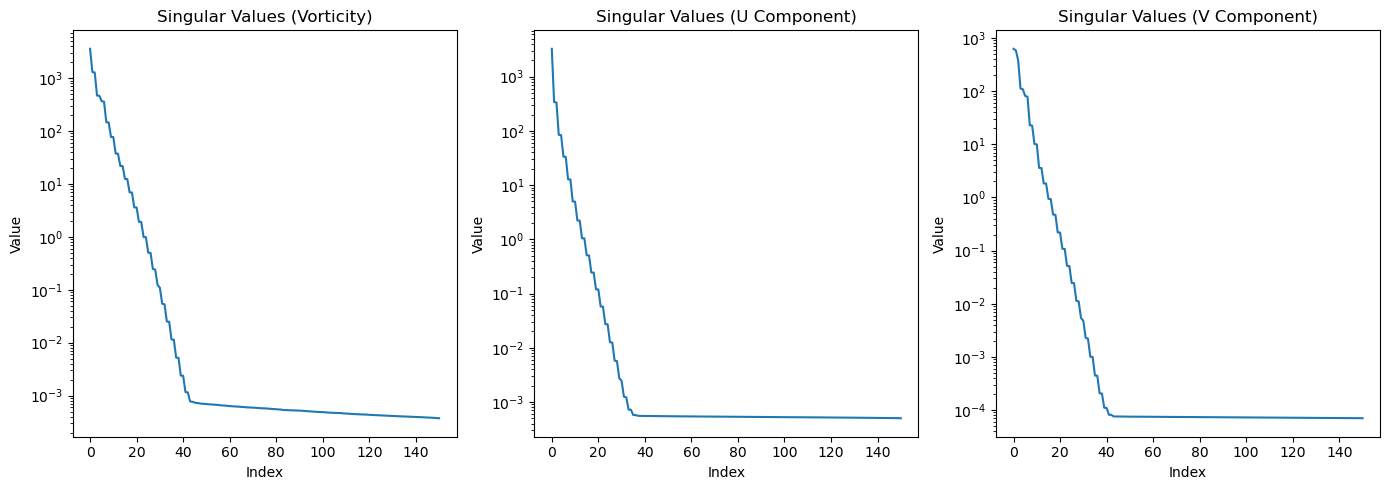

In [5]:
# Plotting Singular Values to determine mode retention
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.semilogy(np.diag(S_vort))
plt.title('Singular Values (Vorticity)')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(1, 3, 2)
plt.semilogy(np.diag(S_u))
plt.title('Singular Values (U Component)')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(1, 3, 3)
plt.semilogy(np.diag(S_v))
plt.title('Singular Values (V Component)')
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [6]:
# Energy threshold for mode retention
energy_threshold = 0.98  # 98% energy

# Calculate cumulative energy for each matrix
cumulative_energy_vort = np.cumsum(np.diag(S_vort)) / np.sum(np.diag(S_vort))
cumulative_energy_u = np.cumsum(np.diag(S_u)) / np.sum(np.diag(S_u))
cumulative_energy_v = np.cumsum(np.diag(S_v)) / np.sum(np.diag(S_v))

# Determine the number of modes to retain
num_modes_vort = np.where(cumulative_energy_vort >= energy_threshold)[0][0] + 1
num_modes_u = np.where(cumulative_energy_u >= energy_threshold)[0][0] + 1
num_modes_v = np.where(cumulative_energy_v >= energy_threshold)[0][0] + 1

# Printing the number of modes to retain
print("Number of modes to retain for Vorticity at {:.2f}% energy: {}".format(energy_threshold*100, num_modes_vort))
print("Number of modes to retain for U Component at {:.2f}% energy: {}".format(energy_threshold*100, num_modes_u))
print("Number of modes to retain for V Component at {:.2f}% energy: {}".format(energy_threshold*100, num_modes_v))


Number of modes to retain for Vorticity at 98.00% energy: 12
Number of modes to retain for U Component at 98.00% energy: 6
Number of modes to retain for V Component at 98.00% energy: 9


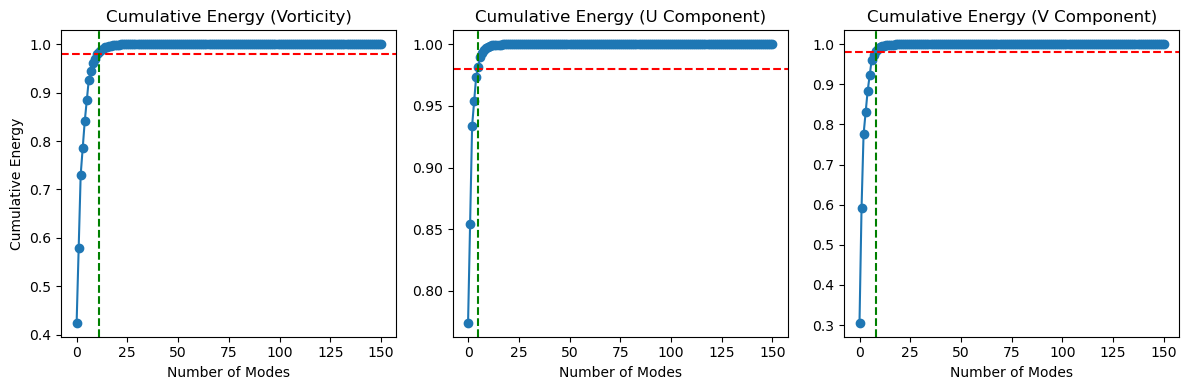

In [7]:
# Plotting the cumulative energy
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(cumulative_energy_vort, marker='o')
plt.title('Cumulative Energy (Vorticity)')
plt.xlabel('Number of Modes')
plt.ylabel('Cumulative Energy')
plt.axhline(y=energy_threshold, color='r', linestyle='--')
plt.axvline(x=num_modes_vort - 1, color='g', linestyle='--')

plt.subplot(1, 3, 2)
plt.plot(cumulative_energy_u, marker='o')
plt.title('Cumulative Energy (U Component)')
plt.xlabel('Number of Modes')
plt.axhline(y=energy_threshold, color='r', linestyle='--')
plt.axvline(x=num_modes_u - 1, color='g', linestyle='--')

plt.subplot(1, 3, 3)
plt.plot(cumulative_energy_v, marker='o')
plt.title('Cumulative Energy (V Component)')
plt.xlabel('Number of Modes')
plt.axhline(y=energy_threshold, color='r', linestyle='--')
plt.axvline(x=num_modes_v - 1, color='g', linestyle='--')

plt.tight_layout()
plt.show()

In [8]:
# Original dimensions
original_dim = num_snapshots_data  # Number of columns in the original matrix corresponds to full dimension

# Dimension reduction and reconstruction for each component
def calculate_reduction_and_error(U, S, VT, num_modes, original_data):
    # Reduced dimensions
    reduced_dim = num_modes
    
    # Reduction ratio
    reduction_ratio = reduced_dim / original_dim
    
    # Reconstruct data from reduced number of modes
    reconstructed_data = U[:, :num_modes] * np.diag(S[:num_modes]) @ VT[:num_modes, :] 
    
    # Calculate reconstruction error
    error = np.linalg.norm(original_data - reconstructed_data, 'fro') / np.linalg.norm(original_data, 'fro')
    
    return reconstructed_data, reduction_ratio, error

# Vorticity
reconstructed_data_vort, reduction_ratio_vort, error_vort = calculate_reduction_and_error(U_vort, S_vort, VT_vort, num_modes_vort, VORTALL)
# U component
reconstructed_data_u, reduction_ratio_u, error_u = calculate_reduction_and_error(U_u, S_u, VT_u, num_modes_u, UALL)
# V component
reconstructed_data_v, reduction_ratio_v, error_v = calculate_reduction_and_error(U_v, S_v, VT_v, num_modes_v, VALL)

# Printing results
print("Vorticity - Reduction Ratio: {:.2f}, Reconstruction Error: {:.2%}".format(reduction_ratio_vort, error_vort))
print("U Component - Reduction Ratio: {:.2f}, Reconstruction Error: {:.2%}".format(reduction_ratio_u, error_u))
print("V Component - Reduction Ratio: {:.2f}, Reconstruction Error: {:.2%}".format(reduction_ratio_v, error_v))



Vorticity - Reduction Ratio: 0.08, Reconstruction Error: 1.29%
U Component - Reduction Ratio: 0.04, Reconstruction Error: 1.17%
V Component - Reduction Ratio: 0.06, Reconstruction Error: 1.61%


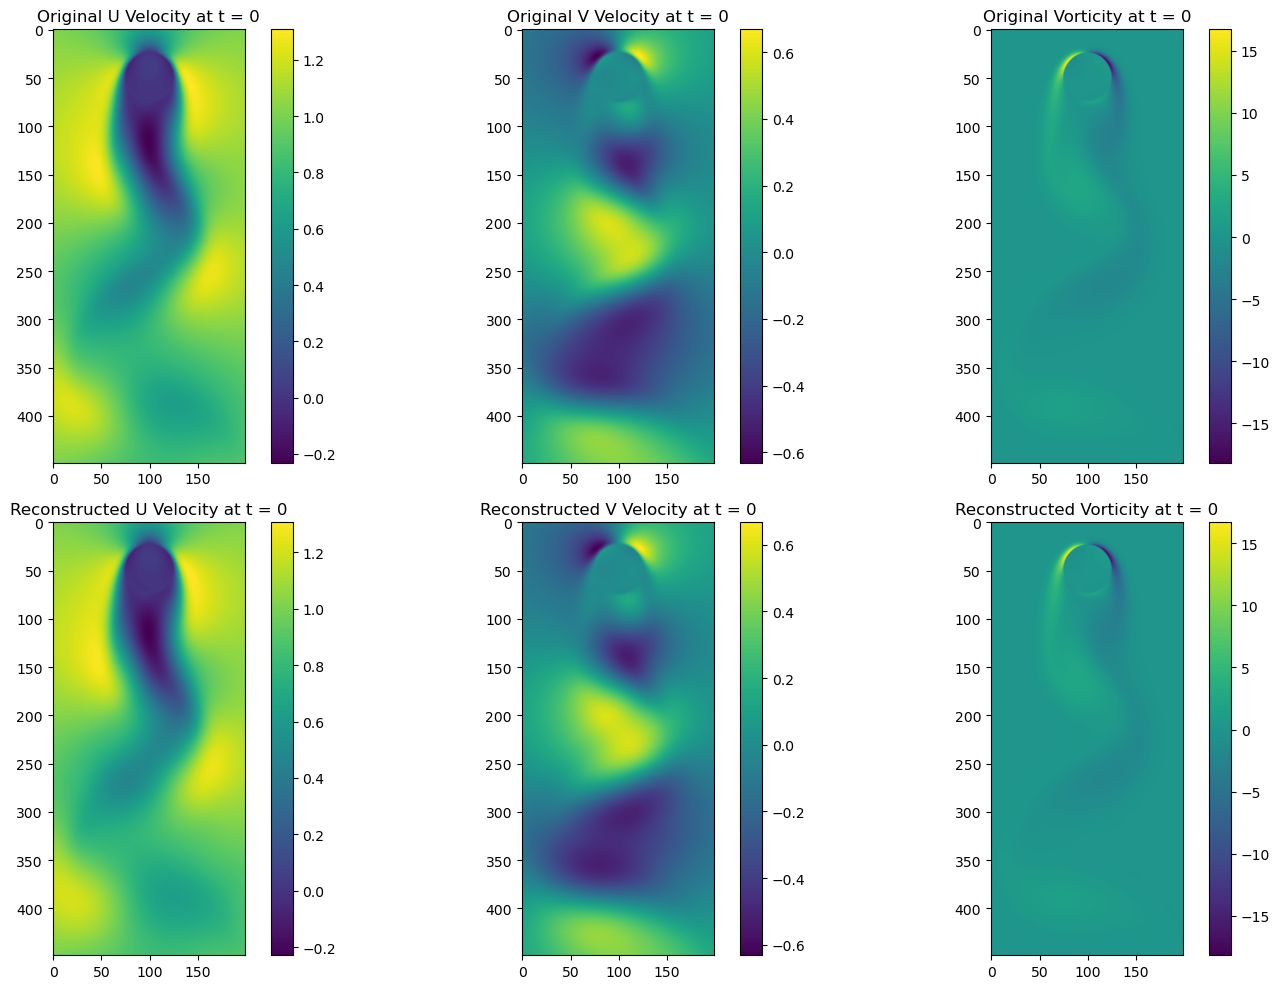

In [9]:
# Plotting the original and reconstructed data

# Choose a time index
t = 0

# Reshape the original data to match the grid dimensions
UALL_t = UALL[:, t].reshape((ny, nx))
VALL_t = VALL[:, t].reshape((ny, nx))
VORTALL_t = VORTALL[:, t].reshape((ny, nx))

# Reshape the reconstructed data
reconstructed_data_u_t = reconstructed_data_u[:, t].reshape((ny, nx))
reconstructed_data_v_t = reconstructed_data_v[:, t].reshape((ny, nx))
reconstructed_data_vort_t = reconstructed_data_vort[:, t].reshape((ny, nx))

# Plot the data
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(UALL_t, cmap='viridis')
plt.title('Original U Velocity at t = {}'.format(t))
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(VALL_t, cmap='viridis')
plt.title('Original V Velocity at t = {}'.format(t))
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(VORTALL_t, cmap='viridis')
plt.title('Original Vorticity at t = {}'.format(t))
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(reconstructed_data_u_t, cmap='viridis')
plt.title('Reconstructed U Velocity at t = {}'.format(t))
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(reconstructed_data_v_t, cmap='viridis')
plt.title('Reconstructed V Velocity at t = {}'.format(t))
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(reconstructed_data_vort_t, cmap='viridis')
plt.title('Reconstructed Vorticity at t = {}'.format(t))
plt.colorbar()

plt.tight_layout()
plt.show()

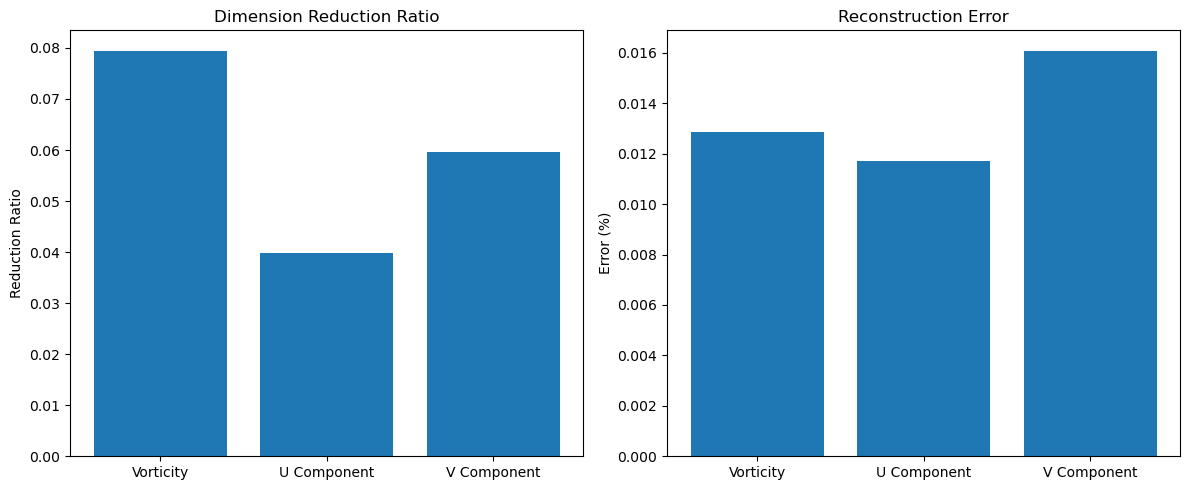

In [10]:
# Plotting the reduction ratios and errors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(['Vorticity', 'U Component', 'V Component'], [reduction_ratio_vort, reduction_ratio_u, reduction_ratio_v])
plt.title('Dimension Reduction Ratio')
plt.ylabel('Reduction Ratio')

plt.subplot(1, 2, 2)
plt.bar(['Vorticity', 'U Component', 'V Component'], [error_vort, error_u, error_v])
plt.title('Reconstruction Error')
plt.ylabel('Error (%)')

plt.tight_layout()
plt.show()